<a href="https://colab.research.google.com/github/Jihen-Boukhadhra/NY_Housing_Data_Analysis/blob/main/ProjetAnalyseDesDonn%C3%A9es_Exploration%26AFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xlrd
import pandas
X = pandas.read_excel("NY-House-DatasetAll.xlsx")
#affichage des données
print(X)

                           TYPE      PRICE  BEDS  BATH  PROPERTYSQFT  \
0                Condo for sale     315000     2     2        1400.0   
1                Condo for sale  195000000     7    10       17545.0   
2                House for sale     260000     4     2        2015.0   
3                Condo for sale      69000     3     1         445.0   
4            Townhouse for sale   55000000     7     3       14175.0   
..                          ...        ...   ...   ...           ...   
495              Condo for sale   16500000     5     4        4105.0   
496          Townhouse for sale     695000     3     3        1793.0   
497              Condo for sale   16500000     5     4        4105.0   
498          Townhouse for sale     695000     3     3        1793.0   
499  Multi-family home for sale     998000     5     3        1738.0   

         SUBLOCALITY   LATITUDE  LONGITUDE  
0          Manhattan  40.761255 -73.974483  
1    New York County  40.766393 -73.980991  


In [ ]:
#dimension
print(X.shape)
#nombre d'individus
n = X.shape[0]
#nombre de variables
p = X.shape[1]
print(n)
print(p)

#afficher les premières lignes du jeu de données
print(X.head())

#description des données
print(X.describe(include='all'))

(500, 6)
500
6
       PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0     315000     2     2        1400.0  40.761255 -73.974483
1  195000000     7    10       17545.0  40.766393 -73.980991
2     260000     4     2        2015.0  40.541805 -74.196109
3      69000     3     1         445.0  40.761398 -73.974613
4   55000000     7     3       14175.0  40.767224 -73.969856
              PRICE       BEDS        BATH  PROPERTYSQFT    LATITUDE  \
count  5.000000e+02  500.00000  500.000000    500.000000  500.000000   
mean   6.754716e+06    3.58400    2.512000   2255.276437   40.701616   
std    9.651201e+07    2.18552    1.635606   2410.902139    0.096501   
min    2.494000e+03    1.00000    1.000000    230.000000   40.501623   
25%    4.250000e+05    2.00000    1.750000   1234.500000   40.621172   
50%    7.999990e+05    3.00000    2.000000   2184.207862   40.699734   
75%    1.300000e+06    4.00000    3.000000   2184.207862   40.773236   
max    2.147484e+09   15.00000   16.000000 

In [ ]:
#accès à une colonne ou plusieurs
print(X.PRICE)
print(X.PRICE.mean())

0         315000
1      195000000
2         260000
3          69000
4       55000000
         ...    
495     16500000
496       695000
497     16500000
498       695000
499       998000
Name: PRICE, Length: 500, dtype: int64
6754715.812


In [ ]:
#matrice de corrélation entre les variables
X.corr()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.091849,0.138912,0.210261,-0.076929,-0.107293
BEDS,0.091849,1.000000,0.691518,0.446017,-0.069152,0.010863
BATH,0.138912,0.691518,1.000000,0.663162,-0.115406,-0.146795
PROPERTYSQFT,0.210261,0.446017,0.663162,1.000000,-0.018697,-0.084106
LATITUDE,-0.076929,-0.069152,-0.115406,-0.018697,1.000000,0.597842
LONGITUDE,-0.107293,0.010863,-0.146795,-0.084106,0.597842,1.000000


In [ ]:
#scikit-learn
import sklearn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.06679132 -0.72549622 -0.31334736 -0.35510898  0.61863641 -0.18950647]
 [ 1.95243895  1.56458023  4.58270516  6.3482611   0.67193779 -0.244598  ]
 [-0.06736177  0.19053436 -0.31334736 -0.09976227 -1.65770547 -2.06575251]
 ...
 [ 0.10107596  0.64854965  0.91066577  0.76800134  0.82822074 -0.24202015]
 [-0.06285005 -0.26748093  0.2986592  -0.19193621 -1.29894885 -1.78663   ]
 [-0.0597074   0.64854965  0.2986592  -0.21477209 -0.12253545  0.97828494]]


In [ ]:
print(Z[0][0])
# Transformer un tableau en DataFrame
NYData=pandas.DataFrame(X,index=X.index,columns=X.columns)
print(NYData)
print(NYData.iloc[0,0])

-0.06679132499977304
                           TYPE      PRICE  BEDS  BATH  PROPERTYSQFT  \
0                Condo for sale     315000     2     2        1400.0   
1                Condo for sale  195000000     7    10       17545.0   
2                House for sale     260000     4     2        2015.0   
3                Condo for sale      69000     3     1         445.0   
4            Townhouse for sale   55000000     7     3       14175.0   
..                          ...        ...   ...   ...           ...   
495              Condo for sale   16500000     5     4        4105.0   
496          Townhouse for sale     695000     3     3        1793.0   
497              Condo for sale   16500000     5     4        4105.0   
498          Townhouse for sale     695000     3     3        1793.0   
499  Multi-family home for sale     998000     5     3        1738.0   

         SUBLOCALITY   LATITUDE  LONGITUDE  
0          Manhattan  40.761255 -73.974483  
1    New York County  40

In [ ]:
#moyenne
print(NYData.mean())
#ecart_type
print(NYData.std())
#matrice de corrélation après standardisation
TNY_DATA=NYData.transpose()
prod=TNY_DATA.dot(NYData)/n
print(prod)

PRICE           0.000000e+00
BEDS           -2.842171e-17
BATH           -1.421085e-17
PROPERTYSQFT   -1.207923e-16
LATITUDE       -6.234657e-14
LONGITUDE      -4.283152e-14
dtype: float64
PRICE           1.001002
BEDS            1.001002
BATH            1.001002
PROPERTYSQFT    1.001002
LATITUDE        1.001002
LONGITUDE       1.001002
dtype: float64
                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.091849  0.138912      0.210261 -0.076929  -0.107293
BEDS          0.091849  1.000000  0.691518      0.446017 -0.069152   0.010863
BATH          0.138912  0.691518  1.000000      0.663162 -0.115406  -0.146795
PROPERTYSQFT  0.210261  0.446017  0.663162      1.000000 -0.018697  -0.084106
LATITUDE     -0.076929 -0.069152 -0.115406     -0.018697  1.000000   0.597842
LONGITUDE    -0.107293  0.010863 -0.146795     -0.084106  0.597842   1.000000


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Charger les données à partir du fichier Excel
df = pd.read_excel("NY-House-Dataset-Vars-Qualitatives.xlsx")

# Afficher les premières lignes du dataframe pour vérifier l'importation
print(df.head())

# Calcul de la table de contingence
contingency_table = pd.crosstab(df['TYPE'], df['SUBLOCALITY'])

print("\nTableau de contingence :")
print(contingency_table)

# Calculer le tableau de contingence en fréquence
contingency_table_freq = contingency_table / contingency_table.values.sum()

print("\nTableau de contingence en fréquence :")
print(contingency_table_freq)

# Calculer les profils-lignes à partir du tableau de contingence
profils_lignes = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("\nTableau des profils-lignes:")
print(profils_lignes)

# Calculer les profils-colonnes à partir du tableau de contingence
profils_colonnes = contingency_table.div(contingency_table.sum(axis=0), axis=1)

print("\nTableau des profils-colonnes:")
print(profils_colonnes)

# Effectuer le test du chi-deux
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nTest du chi-deux :")
print("Statistique du test du chi-deux :", chi2_stat)
print("p-value :", p_value)
print("Degré de liberté :", dof)
print("Fréquences théoriques attendues :")
print(expected)
#tab1
contingency_table.to_csv('contingency_table.csv', index=True)
from google.colab import files
files.download('contingency_table.csv')
#tab2
contingency_table_freq.to_csv('contingency_table_freq.csv', index=True)
files.download('contingency_table_freq.csv')
#tab3
profils_lignes.to_csv('profils_lignes.csv', index=True)
files.download('profils_lignes.csv')
#tab4
profils_colonnes.to_csv('profils_colonnes.csv', index=True)
files.download('profils_colonnes.csv')


             TYPE      SUBLOCALITY
0     Coming Soon     Kings County
1     Coming Soon     Kings County
2  Condo for sale        Manhattan
3  Condo for sale  New York County
4  Condo for sale  New York County

Tableau de contingence :
SUBLOCALITY                 Bronx County  Brooklyn  East Bronx  Kings County  \
TYPE                                                                           
Co-op for sale                         5        17           1             1   
Coming Soon                            0         0           0             2   
Condo for sale                         1        14           0             3   
Contingent                             0         0           0             0   
For sale                               0         1           0             3   
Foreclosure                            0         0           0             0   
House for sale                        15         0           0            25   
Land for sale                          7    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
K = pd.read_csv("contingency_table.csv",header=0,index_col=0)
print(K)

# Calculer le nombre total d'observations
total_observations = np.sum(K.values)
khi2 = 21.03
# Effectuer le test du chi carré
chi2_stat, p_value, dof, expected = chi2_contingency(K)

# Afficher les résultats
print("Statistique du chi carré :", chi2_stat)
#tab1
from google.colab import files
profils_colonnes.to_csv('chi2_stat.csv', index=True)
files.download('chi2_stat.csv')
print("Valeur de p :", p_value)
if chi2_stat > khi2:
  print("On rejette H0 et on accepte H1, les deux vaiables sont dépendantes")
else:
  print("On accepte H0, les deux varaibles sont indépendantes")

# Calculer la matrice de fréquences
matrice_frequences = K / total_observations

# Afficher la matrice de fréquences
print("Matrice de fréquences F :")
print(matrice_frequences)
#tab1
from google.colab import files
profils_colonnes.to_csv('matrice_frequences.csv', index=True)
files.download('matrice_frequences.csv')

                            Bronx County  Brooklyn  East Bronx  Kings County  \
TYPE                                                                           
Co-op for sale                         5        17           1             1   
Coming Soon                            0         0           0             2   
Condo for sale                         1        14           0             3   
Contingent                             0         0           0             0   
For sale                               0         1           0             3   
Foreclosure                            0         0           0             0   
House for sale                        15         0           0            25   
Land for sale                          7         1           0            12   
Multi-family home for sale            18         0           0            22   
Pending                                0         0           0             3   
Townhouse for sale                     1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Valeur de p : 3.110087680308771e-72
On rejette H0 et on accepte H1, les deux vaiables sont dépendantes
Matrice de fréquences F :
                            Bronx County  Brooklyn  East Bronx  Kings County  \
TYPE                                                                           
Co-op for sale                     0.010     0.034       0.002         0.002   
Coming Soon                        0.000     0.000       0.000         0.004   
Condo for sale                     0.002     0.028       0.000         0.006   
Contingent                         0.000     0.000       0.000         0.000   
For sale                           0.000     0.002       0.000         0.006   
Foreclosure                        0.000     0.000       0.000         0.000   
House for sale                     0.030     0.000       0.000         0.050   
Land for sale                      0.014     0.002       0.000         0.024   
Multi-family home for sale         0.036     0.000       0.000         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculer les vecteurs de poids des lignes et des colonnes (distributions marginales)
vecteur_poids_lignes = np.sum(matrice_frequences, axis=1)
vecteur_poids_colonnes = np.sum(matrice_frequences, axis=0)

# Afficher les vecteurs de poids des lignes et des colonnes
print("Vecteur de poids des lignes (distribution marginale des lignes) :\n", vecteur_poids_lignes)
print("Vecteur de poids des colonnes (distribution marginale des colonnes) :\n", vecteur_poids_colonnes)

Vecteur de poids des lignes (distribution marginale des lignes) :
 TYPE
Co-op for sale                0.206
Coming Soon                   0.004
Condo for sale                0.144
Contingent                    0.016
For sale                      0.038
Foreclosure                   0.010
House for sale                0.260
Land for sale                 0.064
Multi-family home for sale    0.172
Pending                       0.026
Townhouse for sale            0.060
dtype: float64
Vecteur de poids des colonnes (distribution marginale des colonnes) :
 Bronx County       0.094
Brooklyn           0.066
East Bronx         0.002
Kings County       0.156
Manhattan          0.008
New York           0.148
New York County    0.064
Queens             0.074
Queens County      0.162
Richmond County    0.170
Staten Island      0.022
The Bronx          0.034
dtype: float64


In [ ]:
# Calculer la matrice des profils de lignes (distribution conditionnelle en ligne)
matrice_profil_lignes = K / K.values.sum(axis=1, keepdims=True)

# Afficher la matrice des profils de lignes
print("Matrice des profils de lignes (distribution conditionnelle en ligne) :")
print(matrice_profil_lignes)
from google.colab import files
matrice_profil_lignes.to_csv('matrice_profil_lignes.csv', index=True)
files.download('matrice_profil_lignes.csv')

Matrice des profils de lignes (distribution conditionnelle en ligne) :
                            Bronx County  Brooklyn  East Bronx  Kings County  \
TYPE                                                                           
Co-op for sale                  0.048544  0.165049    0.009709      0.009709   
Coming Soon                     0.000000  0.000000    0.000000      1.000000   
Condo for sale                  0.013889  0.194444    0.000000      0.041667   
Contingent                      0.000000  0.000000    0.000000      0.000000   
For sale                        0.000000  0.052632    0.000000      0.157895   
Foreclosure                     0.000000  0.000000    0.000000      0.000000   
House for sale                  0.115385  0.000000    0.000000      0.192308   
Land for sale                   0.218750  0.031250    0.000000      0.375000   
Multi-family home for sale      0.209302  0.000000    0.000000      0.255814   
Pending                         0.000000  0.00000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculer la matrice des profils de colonnes (distribution conditionnelle en colonne)
matrice_profil_colonnes =  K / K.values.sum(axis=0, keepdims=True)

# Afficher la matrice des profils de colonnes
print("Matrice des profils de colonnes (distribution conditionnelle en colonne) :")
print(matrice_profil_colonnes)
from google.colab import files
matrice_profil_colonnes.to_csv('matrice_profil_colonnes.csv', index=True)
files.download('matrice_profil_colonnes.csv')

Matrice des profils de colonnes (distribution conditionnelle en colonne) :
                            Bronx County  Brooklyn  East Bronx  Kings County  \
TYPE                                                                           
Co-op for sale                  0.106383  0.515152         1.0      0.012821   
Coming Soon                     0.000000  0.000000         0.0      0.025641   
Condo for sale                  0.021277  0.424242         0.0      0.038462   
Contingent                      0.000000  0.000000         0.0      0.000000   
For sale                        0.000000  0.030303         0.0      0.038462   
Foreclosure                     0.000000  0.000000         0.0      0.000000   
House for sale                  0.319149  0.000000         0.0      0.320513   
Land for sale                   0.148936  0.030303         0.0      0.153846   
Multi-family home for sale      0.382979  0.000000         0.0      0.282051   
Pending                         0.000000  0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

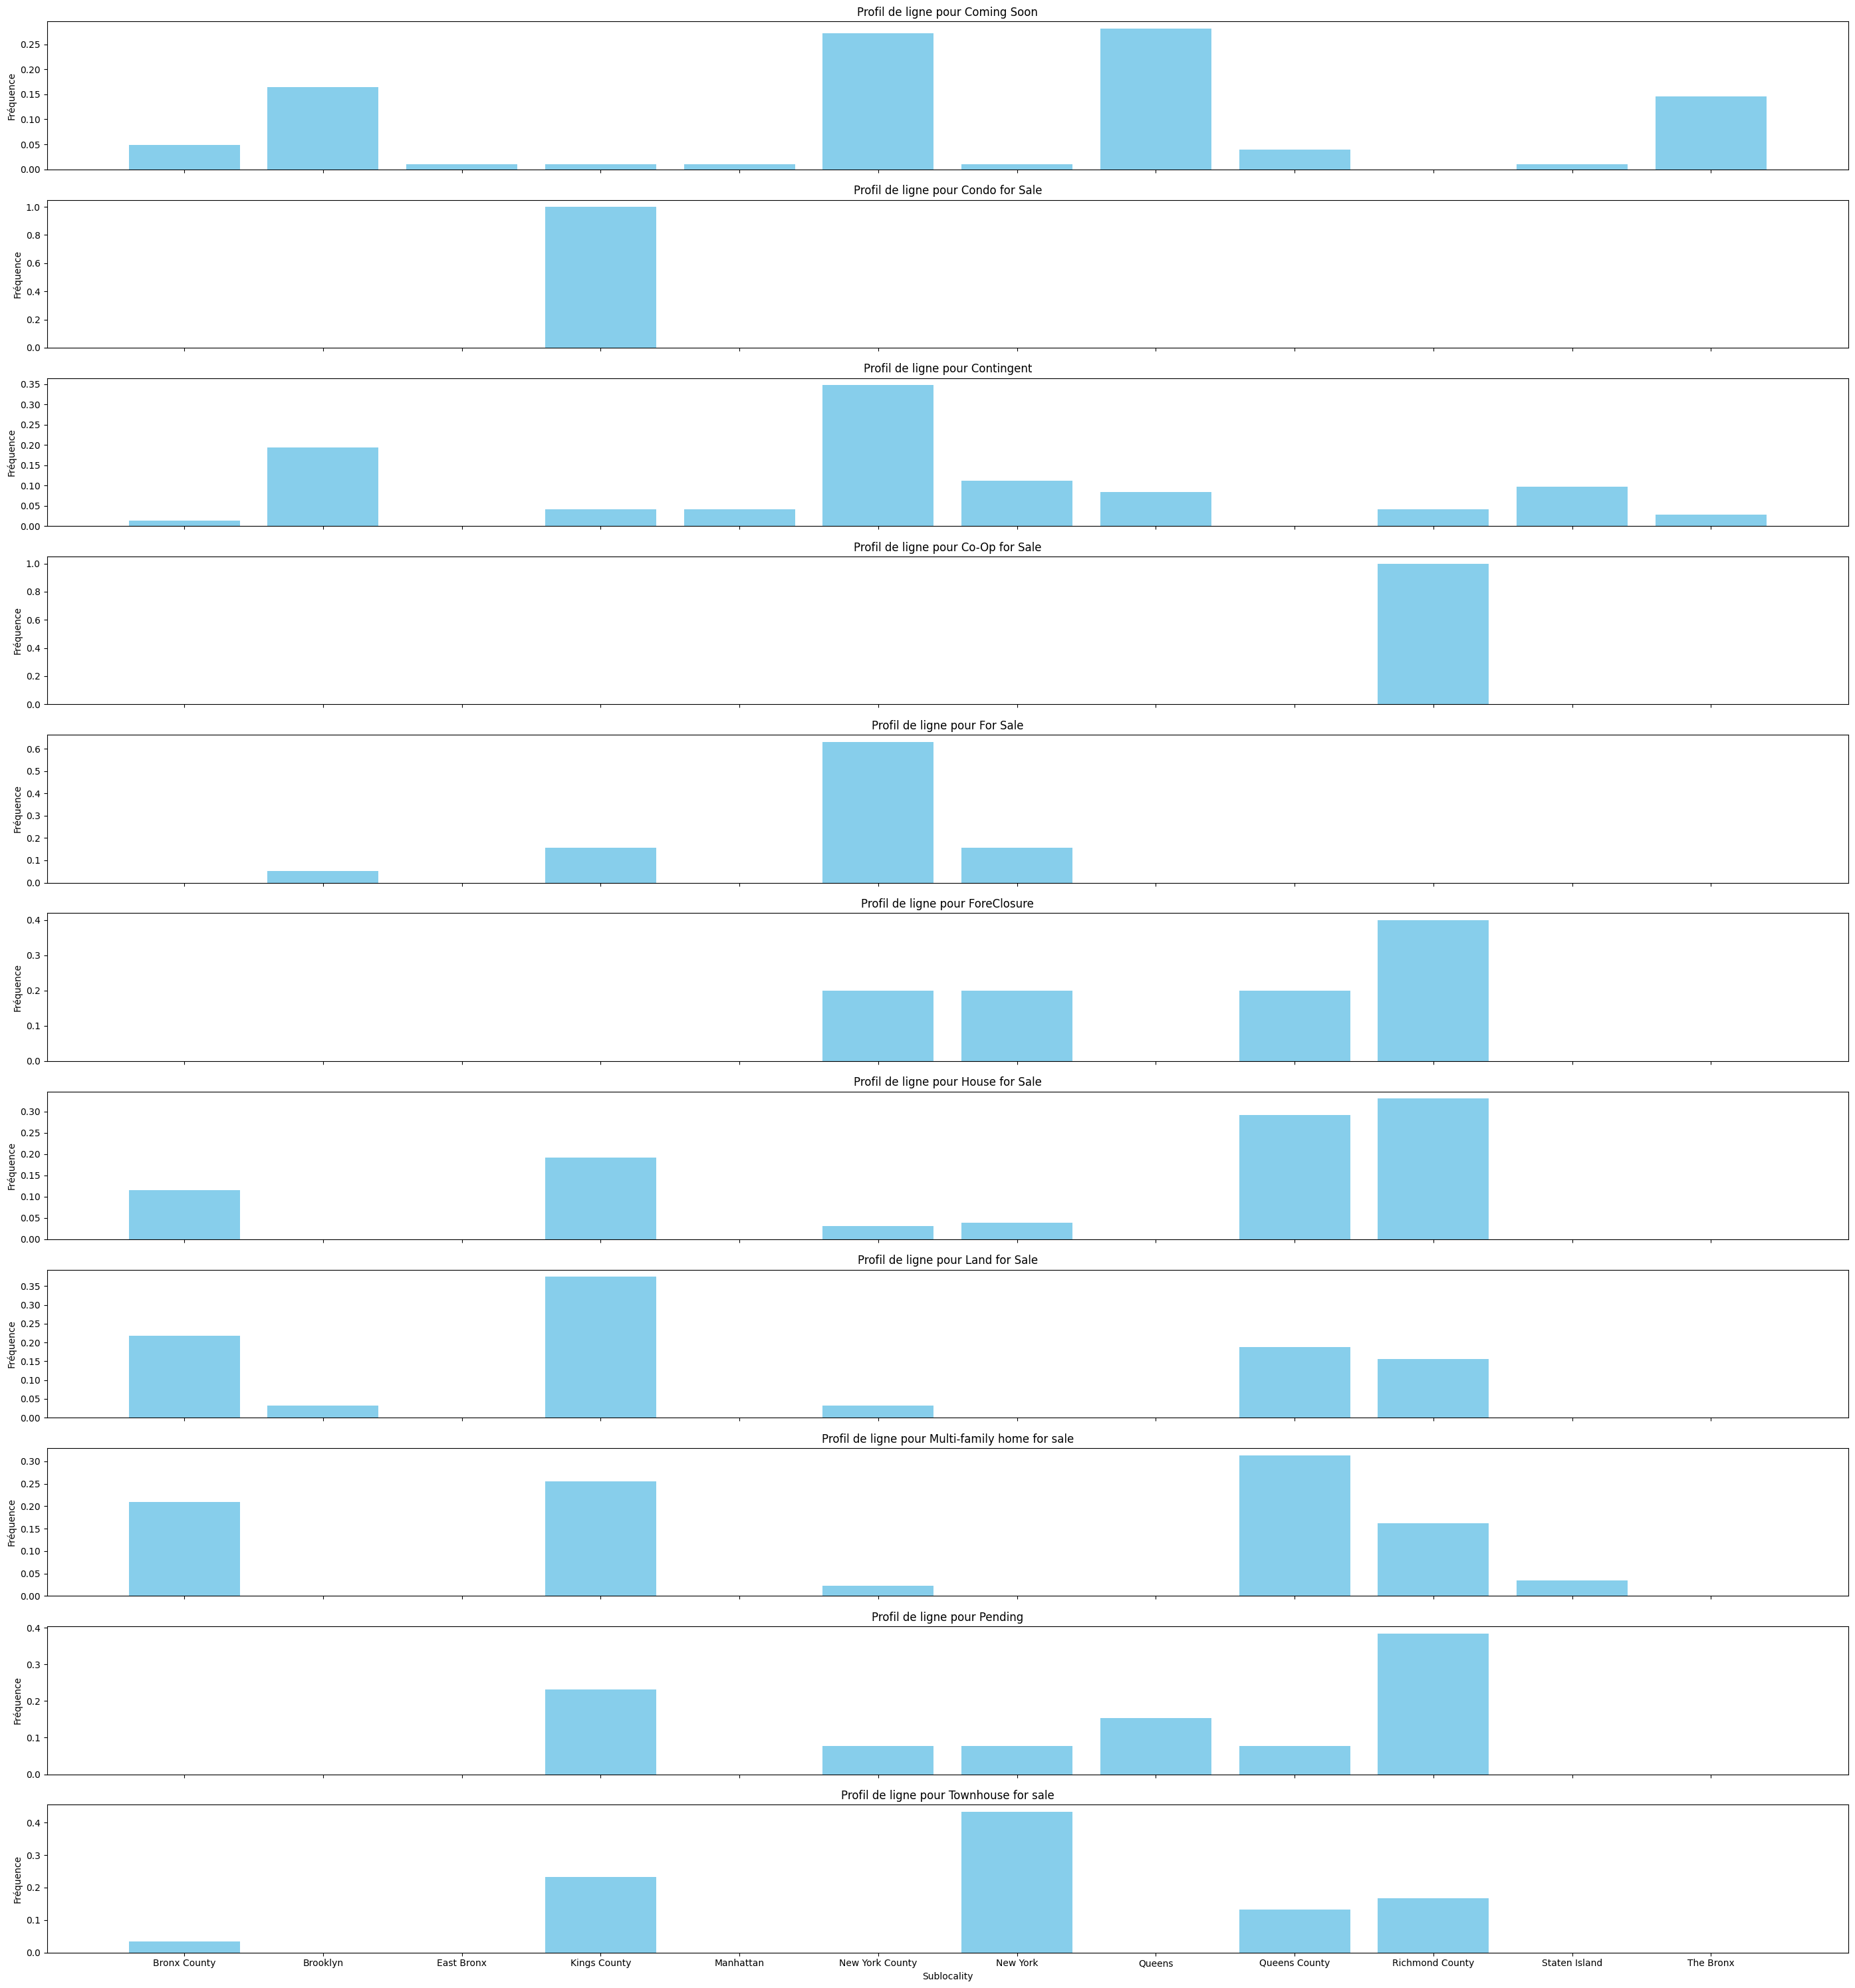

32512

In [ ]:
import matplotlib.pyplot as plt
import os

# Définir les 11 modalités du type
Type = ['Coming Soon', 'Condo for Sale', 'Contingent', 'Co-Op for Sale', 'For Sale', 'ForeClosure', 'House for Sale', 'Land for Sale', 'Multi-family home for sale', 'Pending', 'Townhouse for sale']

# Définir les sublocalités
Sublocality = ['Bronx County', 'Brooklyn', 'East Bronx', 'Kings County', 'Manhattan', 'New York County', 'New York', 'Queens', 'Queens County', 'Richmond County', 'Staten Island', 'The Bronx']

# Créer une figure
fig, axs = plt.subplots(len(Type), 1, figsize=(28, 30), sharex=True)

# Tracer chaque profil de ligne
for i in range(len(Type)):
    axs[i].bar(Sublocality, np.array(matrice_profil_lignes)[i], color='skyblue')
    axs[i].set_ylabel('Fréquence')
    axs[i].set_title(f'Profil de ligne pour {Type[i]}')

# Ajouter une étiquette à l'axe des x au dernier sous-graphique
axs[-1].set_xlabel('Sublocality')

# Ajuster la mise en page
plt.tight_layout()
plt.savefig('profil_plot.png')

# Afficher le graphique
plt.show()
os.system("profil_plot.png")


In [ ]:
# Définir la matrice des profils de lignes (distribution conditionnelle en ligne)
matrice_profil_lignes_tab = np.array(matrice_profil_lignes)

# Calculer le profil de ligne moyen
profil_ligne_moyen = vecteur_poids_colonnes

# Afficher le profil de ligne moyen
print("Profil de ligne moyen :\n", profil_ligne_moyen)

# Calculer le profil de colonne moyen
profil_colonne_moyen = vecteur_poids_lignes

# Afficher le profil de ligne moyen
print("Profil de colonne moyen :\n", profil_colonne_moyen)

Profil de ligne moyen :
 Bronx County       0.094
Brooklyn           0.066
East Bronx         0.002
Kings County       0.156
Manhattan          0.008
New York           0.148
New York County    0.064
Queens             0.074
Queens County      0.162
Richmond County    0.170
Staten Island      0.022
The Bronx          0.034
dtype: float64
Profil de colonne moyen :
 TYPE
Co-op for sale                0.206
Coming Soon                   0.004
Condo for sale                0.144
Contingent                    0.016
For sale                      0.038
Foreclosure                   0.010
House for sale                0.260
Land for sale                 0.064
Multi-family home for sale    0.172
Pending                       0.026
Townhouse for sale            0.060
dtype: float64
